In [103]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

df_master = pd.read_csv("CTrain_TrainingData.csv")
df_master = df_master.sample(frac=1, random_state=42).reset_index(drop=True)

predictors = df_master[['Day', 'Max_Temp', 'Min_Temp', 'Precipitation', 'New_Train_Deployed']]
target_total_ridership = df_master['Total_Ridership']
target_seniors_disability = df_master['Seniors_Disability_Ridership']

total_samples = len(df_master)
train_percent = 0.8  #80% for training
train_samples = int(total_samples * train_percent)

#Random Forest Regressors
model_total_ridership = RandomForestRegressor(n_estimators=100, random_state=42)
model_seniors_ridership = RandomForestRegressor(n_estimators=100, random_state=42)

#Kfold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

y_test_total_fold_arr = []
y_pred_total_fold_arr = []
y_test_seniors_fold_arr = []
y_pred_seniors_fold_arr = []

for fold, (train_index, test_index) in enumerate(kf.split(predictors)):
    train_indices = train_index[:train_samples]
    test_indices = test_index

    X_train, X_test = predictors.iloc[train_indices], predictors.iloc[test_indices]
    y_train_total, y_test_total = target_total_ridership.iloc[train_indices], target_total_ridership.iloc[test_indices]
    y_train_seniors, y_test_seniors = target_seniors_disability.iloc[train_indices], target_seniors_disability.iloc[test_indices]

    model_total_ridership.fit(X_train, y_train_total)
    model_seniors_ridership.fit(X_train, y_train_seniors)

    y_pred_total = model_total_ridership.predict(X_test)
    y_pred_seniors = model_seniors_ridership.predict(X_test)

    #Performance Metrics
    mse_total = mean_squared_error(y_test_total, y_pred_total)
    rmse_total = np.sqrt(mse_total)
    mae_total = mean_absolute_error(y_test_total, y_pred_total)

    mse_seniors = mean_squared_error(y_test_seniors, y_pred_seniors)
    rmse_seniors = np.sqrt(mse_seniors)
    mae_seniors = mean_absolute_error(y_test_seniors, y_pred_seniors)

    y_test_total_fold_arr.append(y_test_total)
    y_pred_total_fold_arr.append(y_pred_total)
    y_test_seniors_fold_arr.append(y_test_seniors)
    y_pred_seniors_fold_arr.append(y_pred_seniors)

    print("--------------------------------")
    print(f"Fold {fold + 1} - Total Ridership: MSE = {mse_total:.2f}, RMSE = {rmse_total:.2f}, MAE = {mae_total:.2f}")
    print(f"Fold {fold + 1} - Seniors & Disability Ridership: MSE = {mse_seniors:.2f}, RMSE = {rmse_seniors:.2f}, MAE = {mae_seniors:.2f}")

model_total_ridership.fit(predictors, target_total_ridership)
model_seniors_ridership.fit(predictors, target_seniors_disability)

feature_importance_total = model_total_ridership.feature_importances_
feature_importance_seniors = model_seniors_ridership.feature_importances_

--------------------------------
Fold 1 - Total Ridership: MSE = 7858644.65, RMSE = 2803.33, MAE = 2181.48
Fold 1 - Seniors & Disability Ridership: MSE = 6127.59, RMSE = 78.28, MAE = 61.56
--------------------------------
Fold 2 - Total Ridership: MSE = 7194741.47, RMSE = 2682.30, MAE = 2095.03
Fold 2 - Seniors & Disability Ridership: MSE = 5304.66, RMSE = 72.83, MAE = 58.38
--------------------------------
Fold 3 - Total Ridership: MSE = 9323604.20, RMSE = 3053.46, MAE = 2391.80
Fold 3 - Seniors & Disability Ridership: MSE = 6386.36, RMSE = 79.91, MAE = 62.94
--------------------------------
Fold 4 - Total Ridership: MSE = 8483954.94, RMSE = 2912.72, MAE = 2234.64
Fold 4 - Seniors & Disability Ridership: MSE = 5944.74, RMSE = 77.10, MAE = 60.52
--------------------------------
Fold 5 - Total Ridership: MSE = 9514075.43, RMSE = 3084.49, MAE = 2336.82
Fold 5 - Seniors & Disability Ridership: MSE = 7296.33, RMSE = 85.42, MAE = 65.75


In [104]:
for i, feature in enumerate(predictors.columns):
    print(f"Feature '{feature}': Total Ridership Importance = {feature_importance_total[i]:.4f}, Seniors & Disability Importance = {feature_importance_seniors[i]:.4f}")

Feature 'Day': Total Ridership Importance = 0.5421, Seniors & Disability Importance = 0.5933
Feature 'Max_Temp': Total Ridership Importance = 0.1851, Seniors & Disability Importance = 0.1599
Feature 'Min_Temp': Total Ridership Importance = 0.1396, Seniors & Disability Importance = 0.1229
Feature 'Precipitation': Total Ridership Importance = 0.1080, Seniors & Disability Importance = 0.1039
Feature 'New_Train_Deployed': Total Ridership Importance = 0.0252, Seniors & Disability Importance = 0.0200


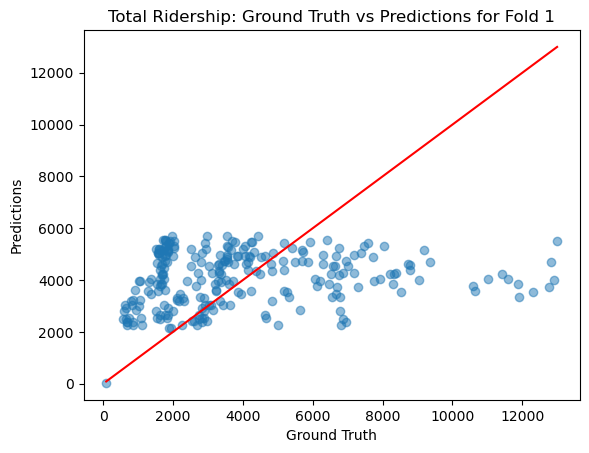

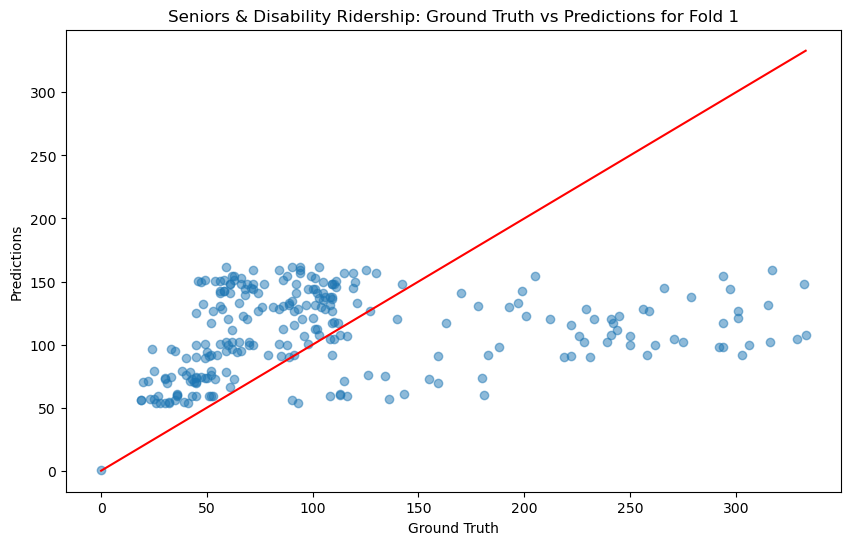

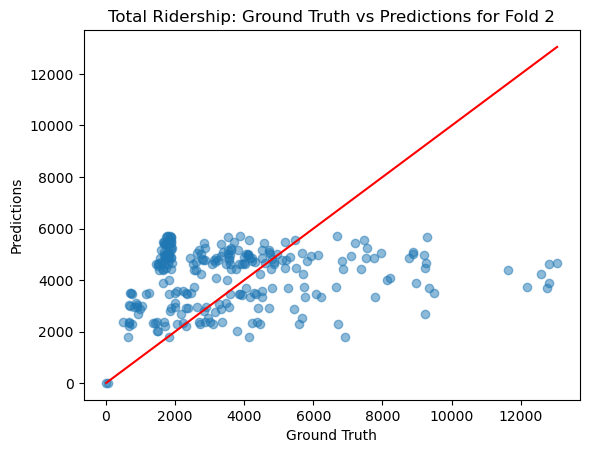

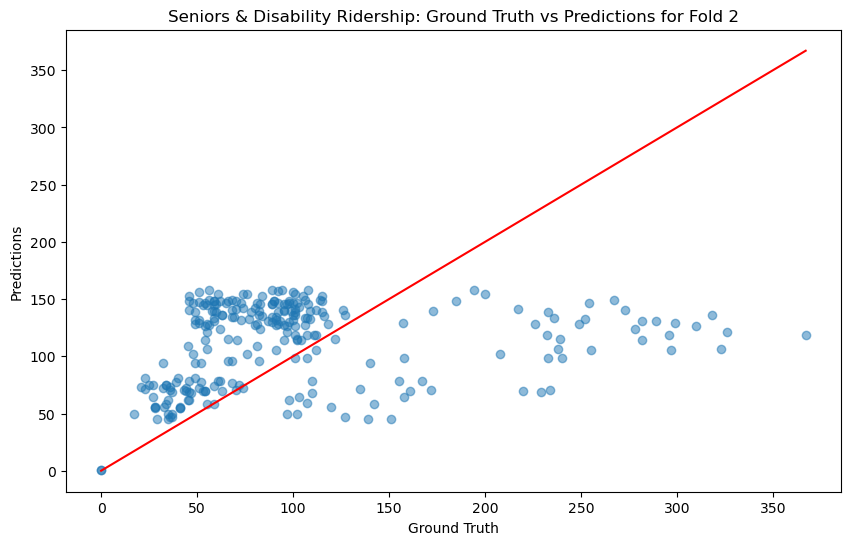

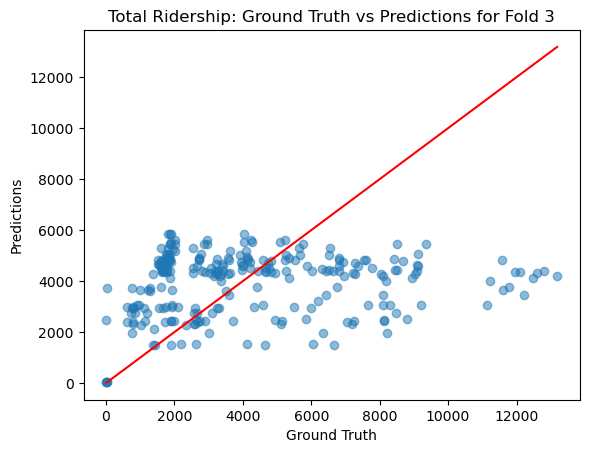

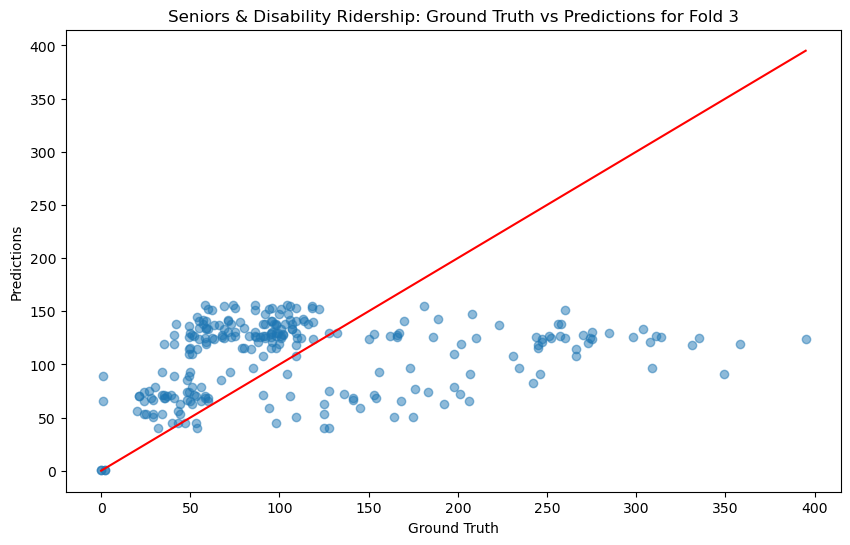

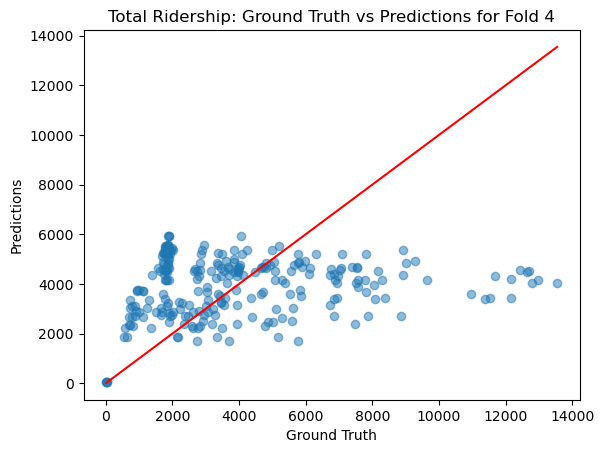

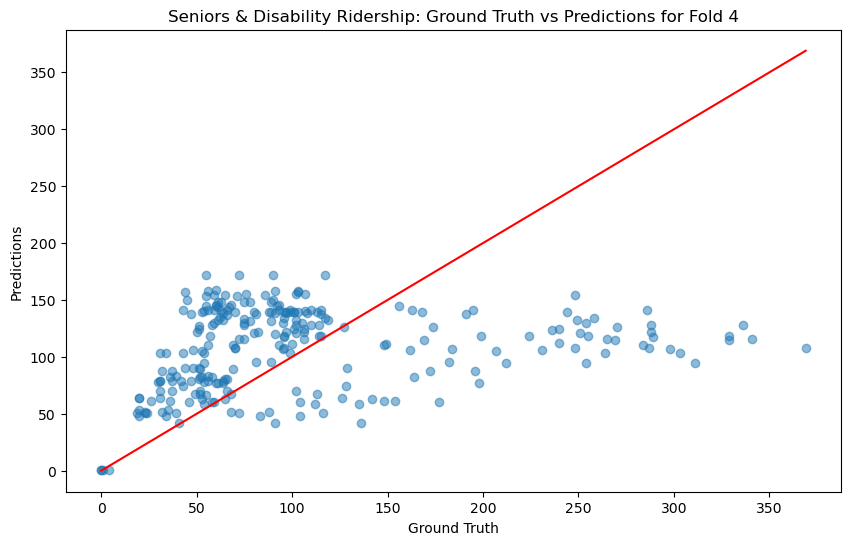

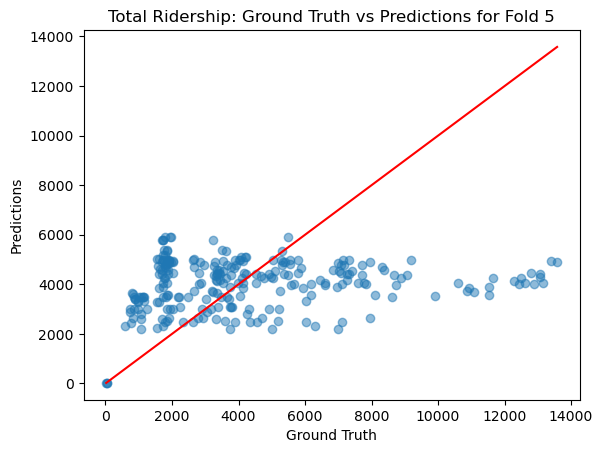

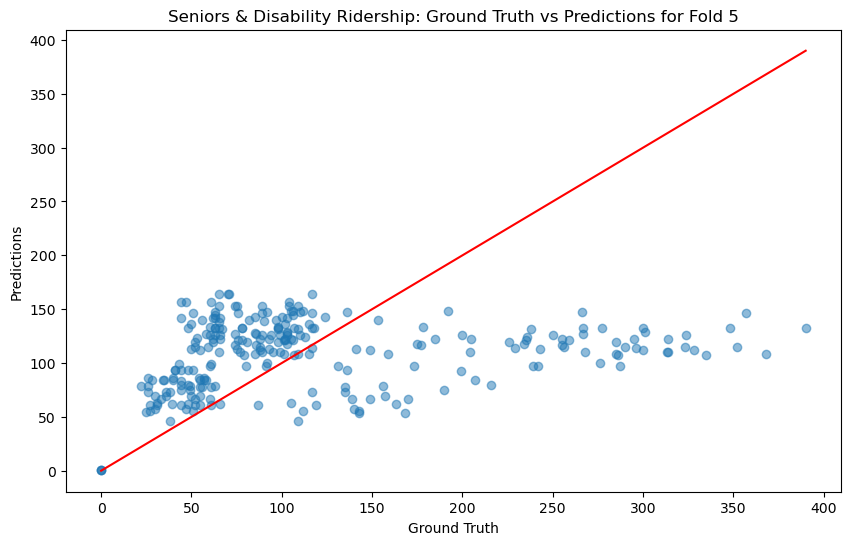

In [105]:
for fold in range(0, len(y_test_total_fold_arr)):
    y_test_total = y_test_total_fold_arr[fold]
    y_pred_total = y_pred_total_fold_arr[fold]
    y_test_seniors = y_test_seniors_fold_arr[fold]
    y_pred_seniors = y_pred_seniors_fold_arr[fold]
    
    # Scatter plot for Total Ridership
    plt.scatter(y_test_total, y_pred_total, alpha=0.5)
    plt.xlabel('Ground Truth')
    plt.ylabel('Predictions')
    plt.title(f'Total Ridership: Ground Truth vs Predictions for Fold {fold + 1}')
    plt.plot([min(y_test_total), max(y_test_total)], [min(y_test_total), max(y_test_total)], color='red') # Diagonal line
    plt.show()

    # Scatter plot for Seniors & Disability Ridership
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_seniors, y_pred_seniors, alpha=0.5)
    plt.xlabel('Ground Truth')
    plt.ylabel('Predictions')
    plt.title(f'Seniors & Disability Ridership: Ground Truth vs Predictions for Fold {fold + 1}')
    plt.plot([min(y_test_seniors), max(y_test_seniors)], [min(y_test_seniors), max(y_test_seniors)], color='red') # Diagonal line
    plt.show()

In [106]:
def flattenArray(array):
    return [item for nestedArray in array for item in nestedArray]

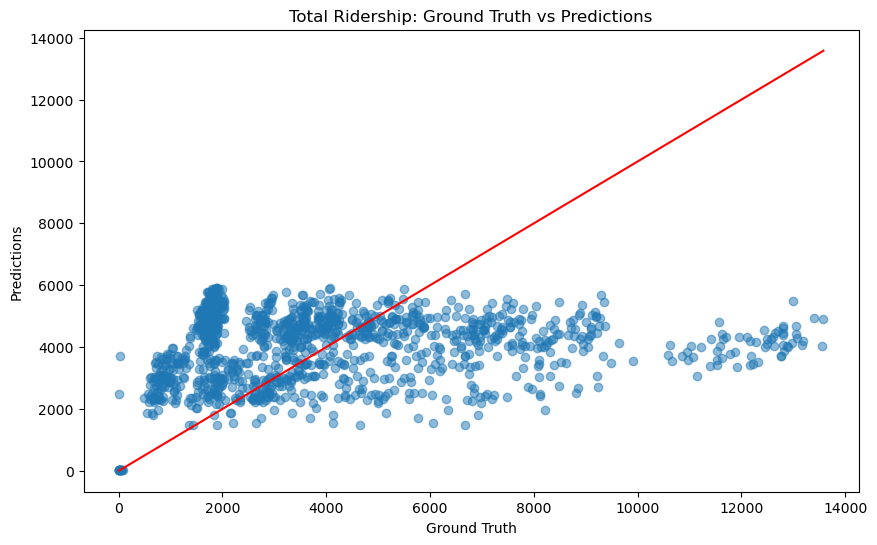

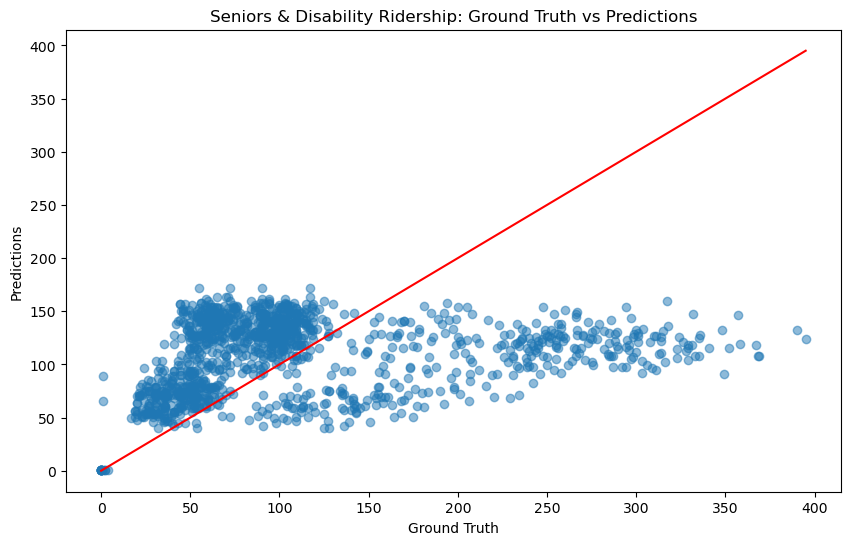

In [107]:
# Convert lists to numpy arrays for plotting
y_test_total_all = np.array(flattenArray(y_test_total_fold_arr))
y_pred_total_all = np.array(flattenArray(y_pred_total_fold_arr))
y_test_seniors_all = np.array(flattenArray(y_test_seniors_fold_arr))
y_pred_seniors_all = np.array(flattenArray(y_pred_seniors_fold_arr))

# Scatter plot for Total Ridership
plt.figure(figsize=(10, 6))
plt.scatter(y_test_total_all, y_pred_total_all, alpha=0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Total Ridership: Ground Truth vs Predictions')
plt.plot([min(y_test_total_all), max(y_test_total_all)], [min(y_test_total_all), max(y_test_total_all)], color='red') # Diagonal line
plt.show()

# Scatter plot for Seniors & Disability Ridership
plt.figure(figsize=(10, 6))
plt.scatter(y_test_seniors_all, y_pred_seniors_all, alpha=0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Seniors & Disability Ridership: Ground Truth vs Predictions')
plt.plot([min(y_test_seniors_all), max(y_test_seniors_all)], [min(y_test_seniors_all), max(y_test_seniors_all)], color='red') # Diagonal line
plt.show()

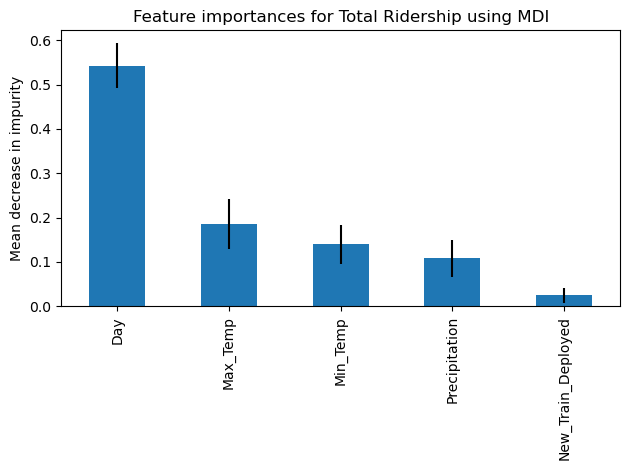

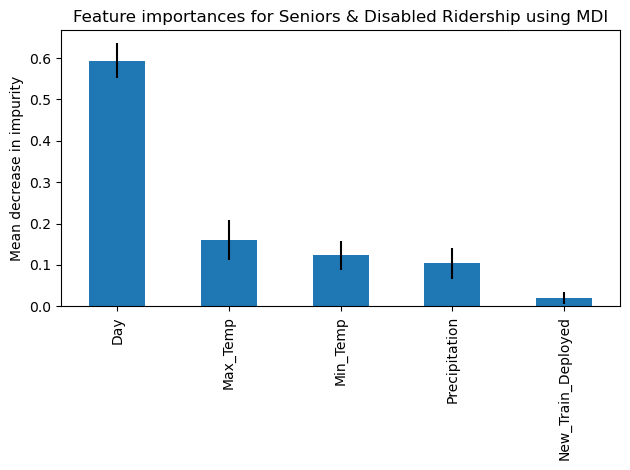

In [108]:
total_importances = pd.Series(feature_importance_total, index=predictors.columns)
seniors_importances = pd.Series(feature_importance_seniors, index=predictors.columns)

total_std = np.std([estimator.feature_importances_ for estimator in model_total_ridership.estimators_], axis=0)
seniors_std = np.std([estimator.feature_importances_ for estimator in model_seniors_ridership.estimators_], axis=0)

fig, ax = plt.subplots()
total_importances.plot.bar(yerr=total_std, ax=ax)
ax.set_title("Feature importances for Total Ridership using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

fig, ax = plt.subplots()
seniors_importances.plot.bar(yerr=seniors_std, ax=ax)
ax.set_title("Feature importances for Seniors & Disabled Ridership using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()